In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.shape

(800, 13)

In [4]:
# drop missing value-kolom type 2
df.drop('Type 2', axis=1, inplace=True)
df.shape

(800, 12)

In [5]:
# visualize label count in each category
for i in ['Type 1', 'Generation', 'Legendary']:
    print(i, ':')
    print(df[i].value_counts())
    print('-'*50)

Type 1 :
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
--------------------------------------------------
Generation :
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64
--------------------------------------------------
Legendary :
False    735
True      65
Name: Legendary, dtype: int64
--------------------------------------------------


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


Step:
- EDA menentukan variabel menarik untuk di hypothesis testing
- Siapkan subset data yang siap untuk di uji Hypotest
- Catat mean dan statistik deskriptif dari masing2 variabel
- Tentukan Jenis Uji Hypotesting
- Buat Hypothesis statement berdasarkan fakta di data
- Lakukan Uji Hypotest
- Ambil Kesimpulan.

## T-test 1 sample 2 tailed

In [7]:
df.head(5)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [8]:
# water type pokemon descriptive statistic

# slicing dataframe to get water type pokemon only
water_type = df[df['Type 1']=='Water']

In [9]:
water_type.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,320,50,52,48,65,50,55,1,False


In [10]:
# descriptive statictics to see central tendency
water_type.describe().T

,count,mean,std,min,25%,50%,75%,max
#,112.0,303.089286,188.440807,7.0,130.00,275.0,456.25,693.0
Total,112.0,430.455357,113.188266,200.0,328.75,455.0,502.25,770.0
HP,112.0,72.062500,27.487026,20.0,52.25,70.0,90.25,170.0
Attack,112.0,74.151786,28.377192,10.0,53.00,72.0,92.00,155.0
Defense,112.0,72.946429,27.773809,20.0,54.50,70.0,88.50,180.0
Sp. Atk,112.0,74.812500,29.030128,10.0,55.00,70.0,90.50,180.0
Sp. Def,112.0,70.517857,28.460493,20.0,50.00,65.0,89.25,160.0
Speed,112.0,65.964286,23.019353,15.0,50.00,65.0,82.00,122.0
Generation,112.0,2.857143,1.558800,1.0,1.00,3.0,4.00,6.0


Water-Type HP

- mean = 72.06
- std = 27.48
- median = 70.0

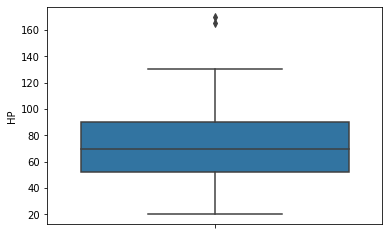

In [11]:
sns.boxplot(data=water_type, y='HP')

In [12]:
water_type[water_type['HP']>140]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
351,321,Wailord,Water,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,470,165,75,80,40,45,65,5,False


1. Apakah rata-rata `HP` dari pokemon bertipe water berbeda signifikan dari 70?

Pokemon bertipe 1 water memiliki rata-rata HP sebesar 72.06, berdasarkan data tersebut dapat dibuat hipotesis berupa:

- H0 = Rata-rata HP tipe Water = 70
- H1 = Rata-rata HP tipe Water != 70

In [13]:
# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(water_type['HP'], 70)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.42883163104089694
t-statistics: 0.7941000348708636


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


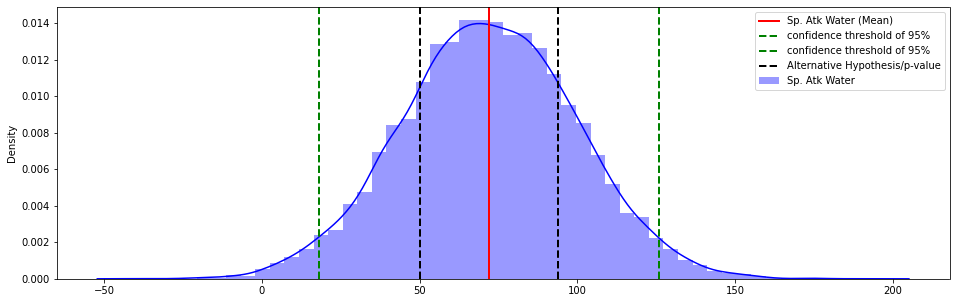

In [14]:
#simulasi
pop = np.random.normal(water_type['HP'].mean(), water_type['HP'].std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, water_type['HP'].mean(), water_type['HP'].std())

plt.figure(figsize=(16,5))
# memvisualisasikan simulasi pdf
sns.distplot(pop, label='Sp. Atk Water', color='blue')
plt.axvline(water_type['HP'].mean(), color='red', linewidth=2, label='Sp. Atk Water (Mean)')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

## T-test 2 sample 1 Tailed and 2 Tailed

In [15]:
df.groupby('Generation')[['Total', 'HP','Attack']].mean()

,Total,HP,Attack
Generation,,,
1,426.813253,65.819277,76.638554
2,418.283019,71.207547,72.028302
3,436.225000,66.543750,81.625000
4,459.016529,73.082645,82.867769
5,434.987879,71.787879,82.066667
6,436.378049,68.268293,75.804878


In [16]:
# Slicing Pokemon Gen 1 df
Gen_1 = df[df['Generation']==1]

# descriptive statistics to see central tendency of gen 1
Gen_1.describe().T

,count,mean,std,min,25%,50%,75%,max
#,166.0,75.819277,45.153246,1.0,36.25,76.5,115.00,151.0
Total,166.0,426.813253,115.878076,195.0,325.00,436.5,500.00,780.0
HP,166.0,65.819277,28.153968,10.0,46.50,62.0,80.00,250.0
Attack,166.0,76.638554,30.744727,5.0,55.00,75.0,95.00,190.0
Defense,166.0,70.861446,28.641336,5.0,50.00,66.0,85.00,180.0
Sp. Atk,166.0,71.819277,34.439106,15.0,45.00,65.0,95.00,194.0
Sp. Def,166.0,69.090361,25.505275,20.0,50.00,70.0,85.00,130.0
Speed,166.0,72.584337,29.675857,15.0,50.00,70.0,92.25,150.0
Generation,166.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [17]:
# Slicing Pokemon Gen 4 df
Gen_4 = df[df['Generation']==4]

# descriptive statistics to see central tendency of gen 4
Gen_4.describe().T

,count,mean,std,min,25%,50%,75%,max
#,121.0,442.446281,31.250053,387.0,415.0,444.0,471.0,493.0
Total,121.0,459.016529,119.556541,194.0,350.0,485.0,530.0,720.0
HP,121.0,73.082645,25.113604,20.0,55.0,70.0,85.0,150.0
Attack,121.0,82.867769,32.780569,5.0,62.0,80.0,103.0,170.0
Defense,121.0,78.132231,30.145741,5.0,51.0,72.0,105.0,168.0
Sp. Atk,121.0,76.404959,31.907047,10.0,54.0,71.0,100.0,150.0
Sp. Def,121.0,77.190083,27.498883,30.0,55.0,75.0,100.0,150.0
Speed,121.0,71.338843,28.475005,5.0,46.0,77.0,91.0,135.0
Generation,121.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


Attack Gen 1:
- mean = 76.638554
- std = 30.744727	

Attack Gen 4:
- mean = 82.867769
- std = 32.780569

## Hypothesis Testing T-Test 2 Sample 2 Tailed

- H0 = Mean of Attack from Gen 4 = Mean of Attack From Gen 1
- H1 = Mean of Attack from Gen 4 != Mean of Attack From Gen 1

In [18]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Attack'], Gen_1['Attack'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.10041663346867609
t-statistics: 1.6481850363938986


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18.619034006688267


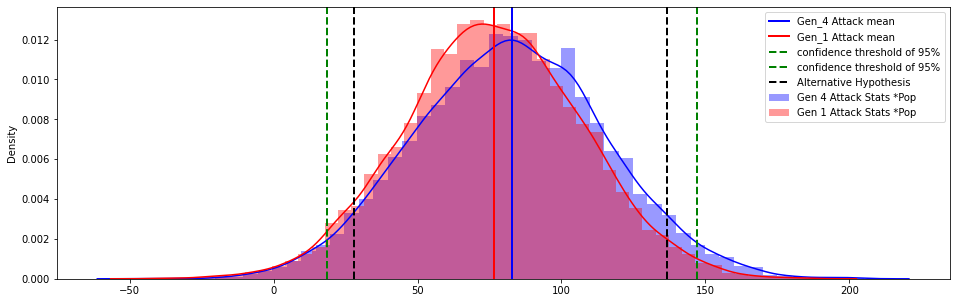

In [19]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Attack'].mean(),Gen_4['Attack'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Attack'].mean(),Gen_1['Attack'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, Gen_4['Attack'].mean(), Gen_4['Attack'].std())

plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Attack Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Attack Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Attack'].mean(), color='blue', linewidth=2, label='Gen_4 Attack mean')
plt.axvline(Gen_1['Attack'].mean(), color='red',  linewidth=2, label='Gen_1 Attack mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(gen_4_pop.mean()+t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(gen_4_pop.mean()-t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

## Hypothesis testing T-Test 2 Sample 1 Tailed

- H0 = Mean of Attack from Gen 4 <= Mean of Attack From Gen 1
- H1 = Mean of Attack from Gen 4 > Mean of Attack From Gen 1

1. Attack Gen 1:

- mean = 76.638554
- std = 30.744727

2. Attack Gen 4:

- mean = 82.867769
- std = 32.780569

In [20]:
import scipy

scipy.__version__

'1.7.3'

In [21]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test,

In [41]:
# t-test 2 sample 1 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Attack'], Gen_1['Attack']) # default H1 = mean_1 > mean_0

# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.050208316734338045
t-statistics: 1.6481850363938986


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


28.94853081910076


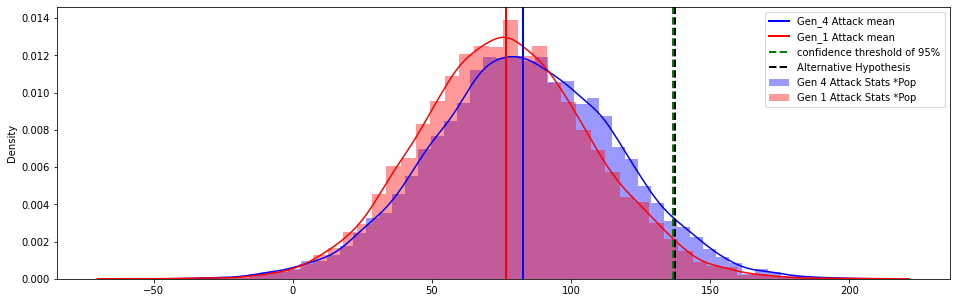

In [42]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Attack'].mean(),Gen_4['Attack'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Attack'].mean(),Gen_1['Attack'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 1 tailed, confidence interval 0.90 
ci = stats.norm.interval(0.90, Gen_4['Attack'].mean(), Gen_4['Attack'].std())

plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Attack Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Attack Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Attack'].mean(), color='blue', linewidth=2, label='Gen_4 Attack mean') 
plt.axvline(Gen_1['Attack'].mean(), color='red',  linewidth=2, label='Gen_1 Attack mean')

# plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# plt.axvline(gen_4_pop.mean()+t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(gen_4_pop.mean()+t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')

plt.legend()
print(ci[0])

In [24]:
Gen_4['Total'].mean()

459.0165289256198

In [25]:
Gen_1['Total'].mean()

426.81325301204816

In [26]:
# another example
# !pip install scipy==1.7.0

# t-test 2 sample 1 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Total'], Gen_1['Total'], alternative='greater') # default H1 = n0 > n1

# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
print('P-value:',p_val) # bila sudah state parameter alternative less/greater utk 1 tail, p-value tidak perlu dibagi 2
print('t-statistics:',t_stat)

P-value: 0.011260062440665236
t-statistics: 2.2939623663045916


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


262.36351955622706


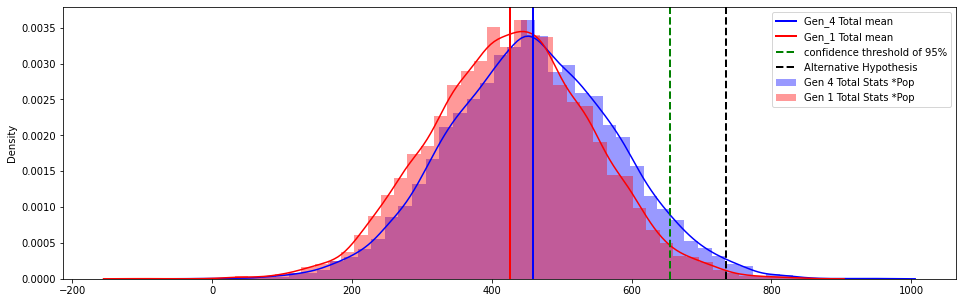

In [27]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Total'].mean(),Gen_4['Total'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Total'].mean(),Gen_1['Total'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 1 tailed, confidence interval 0.90 
ci = stats.norm.interval(0.90, Gen_4['Total'].mean(), Gen_4['Total'].std())

# distribution
plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Total Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Total Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Total'].mean(), color='blue', linewidth=2, label='Gen_4 Total mean')
plt.axvline(Gen_1['Total'].mean(), color='red',  linewidth=2, label='Gen_1 Total mean')

# ci line
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
# plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# h1 line
plt.axvline(gen_4_pop.mean()+t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
# plt.axvline(gen_4_pop.mean()-t_stat*gen_4_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

## Anova

Compare Overall stats (`Total`) from pokemon Gen 1, Gen 2, and Gen 3.

In [28]:
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [29]:
df.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

In [30]:
Total_gen_1 = df[df['Generation']==1]['Total']
Total_gen_1.mean()

426.81325301204816

In [31]:
Total_gen_2 = df[df['Generation']==2]['Total']
Total_gen_2.mean()

418.2830188679245

In [32]:
Total_gen_3 = df[df['Generation']==3]['Total']
Total_gen_3.mean()

436.225

Hypothesis Statement

ANOVA

- H0: μ1 == μ2 == μ3
- H1: μ1 != μ2 != μ3

In [33]:
f_stat,p_value = stats.f_oneway(Total_gen_1, Total_gen_2, Total_gen_3)
print('P-value:',p_value)

P-value: 0.5095075633438346


In [34]:
# extras
# uji lanjut tukey bila p-val<0.05
from statsmodels.stats import multicomp

help(multicomp.pairwise_tukeyhsd)

Help on function pairwise_tukeyhsd in module statsmodels.stats.multicomp:

pairwise_tukeyhsd(endog, groups, alpha=0.05)
    Calculate all pairwise comparisons with TukeyHSD confidence intervals
    
    Parameters
    ----------
    endog : ndarray, float, 1d
        response variable
    groups : ndarray, 1d
        array with groups, can be string or integers
    alpha : float
        significance level for the test
    
    Returns
    -------
    results : TukeyHSDResults instance
        A results class containing relevant data and some post-hoc
        calculations, including adjusted p-value
    
    Notes
    -----
    This is just a wrapper around tukeyhsd method of MultiComparison
    
    See Also
    --------
    MultiComparison
    tukeyhsd
    statsmodels.sandbox.stats.multicomp.TukeyHSDResults



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
for_tukey = df.query("Generation == 1 | Generation == 2 | Generation == 3")[['Generation', 'Total']]
for_tukey

,Generation,Total
0,1,318
1,1,405
2,1,525
3,1,625
4,1,309
...,...,...
427,3,600
428,3,600
429,3,600
430,3,600


In [36]:
tukey = multicomp.pairwise_tukeyhsd(endog=for_tukey['Total'], groups=for_tukey['Generation'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -8.5302 0.8296 -45.0332 27.9728  False
     1      3   9.4117 0.7547 -23.1154 41.9389  False
     2      3   17.942 0.4869 -18.8268 54.7107  False
-----------------------------------------------------
